In this case study, we are going to work on the Netflix movies and TV shows dataset.
Our first task is to read the dataset and print the shape of the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Open and read data file as specified in the question
## Print the required output in given format
df = pd.read_csv("netflix_dataset.csv")
print(df.shape)

(7787, 12)


We describe the dataset using the pandas describe API giving us all statistical details about the numerical fields

In [3]:
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


We print the datatype of each column.

In [4]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


We print the number of NA values in each column.

In [6]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


Our task is to remove the NA values and replace them with some meaningful data. 

1) For 'cast' and 'director' columns, replacing NA values with 'No Data'(As these have a large number of NA values present).

2) Replacing 'country', 'date_added' and 'rating' with the mode of the column (For the columns with 500 or fewer NA values present)

In [7]:
df['cast'].fillna('No Data',inplace = True)
df['director'].fillna('No Data',inplace = True)
df['country'].fillna('No Data',inplace = True)
df['date_added'].fillna('No Data',inplace = True)
df['rating'].fillna('No Data',inplace = True)

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Printing the overall percentage of TV shows and Movies. 
A pie chart showing the percentage of TV shows and Movies.

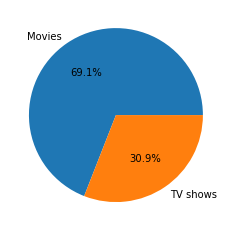

In [9]:
df_movies = df[df['type'] == 'Movie']
num_movies = len(df_movies['type'])

df_tv_shows = df[df['type'] == 'TV Show']
num_tv_shows = len(df_tv_shows['type'])

ans_list = []
ans_list.append(num_movies)
ans_list.append(num_tv_shows)

pc_labels = ['Movies', 'TV shows']
plt.pie(ans_list, labels = pc_labels, autopct = '%1.1f%%')
plt.show()

Using the bar plot, showing the top 10 countries with most content.

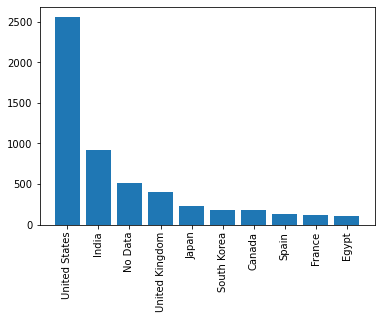

United States 2555
India 923
No Data 507
United Kingdom 397
Japan 226
South Korea 183
Canada 177
Spain 134
France 115
Egypt 101


In [13]:
import operator

df = df[df['country'].notna()]

country_wise_frequency = {}
for ind in df.index:
    country = df['country'][ind]
    if country != "":
        country_wise_frequency[country] = country_wise_frequency.get(country, 0) + 1
    
sorted_d = dict( sorted(country_wise_frequency.items(), key=operator.itemgetter(1),reverse=True))
# print(sorted_d)

country = list(sorted_d.keys())[0:10]
frequency = list(sorted_d.values())[0:10]

# print(country)
# print()

plt.bar(country, frequency)
plt.xticks(rotation=90)
plt.show()

for i in range(10):
    print(country[i], end=" ")
    print(frequency[i])

For the Netflix dataset, firstly creating a bar chart for all the content added over the years. And the printing the year having the most number of content added.

[2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 2021, 1998, 1997, 1993, 1990, 1995, 1996, 1992, 1991, 1988, 1994, 1982, 1989, 1979, 1973, 1986, 1983, 1984, 1985, 1976, 1981, 1980, 1977, 1974, 1987, 1975, 1978, 1967, 1968, 1971, 1960, 1972, 1945, 1955, 1962, 1944, 1943, 1958, 1946, 1965, 1942, 1969, 1963, 1954, 1970, 1956, 1925, 1964, 1966, 1947, 1959]
[1121, 1012, 996, 882, 868, 541, 334, 267, 219, 173, 166, 137, 125, 85, 85, 73, 59, 49, 45, 36, 34, 33, 31, 31, 30, 22, 20, 19, 19, 18, 17, 16, 16, 15, 13, 11, 10, 10, 9, 9, 9, 9, 9, 9, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


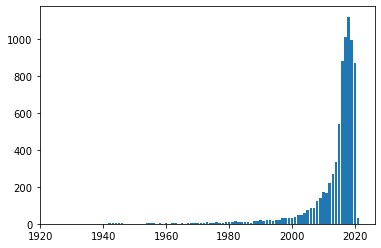

Year in which most content was added : 2019


In [19]:
counts=df["release_year"].value_counts()
d=dict(counts)
x_values=list(d.keys())
y_values=list(d.values())
print(x_values)
print(y_values)
plt.bar(x_values,y_values)
plt.xticks()
plt.show()
print("Year in which most content was added : ", end="")
print(2019)

Finding the most popular type of content in India. This popularity should is measured on two parameters:

1) What type of content is more popular, Movies or TV shows. (Ploting Piechart to find this)

2) What type of rating is more popular. If it's teens or adults or kids.(Ploting Bar graph to find this) 

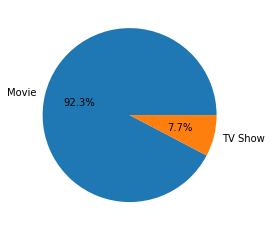

In [21]:
df = df[df['country'] == "India"]

df1 = df.groupby('type')['type'].count()
# print(df1)

type_labels = df1.index
values_types = df1.values
plt.pie(values_types, labels = type_labels, autopct = '%1.1f%%')
plt.show()

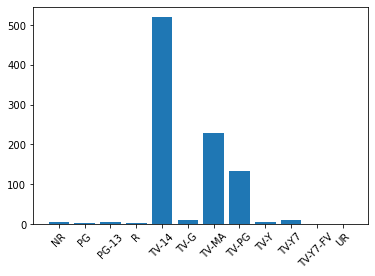

In [22]:
df2 = df.groupby('rating')['type'].count()
# print(df2)

rating_labels = df2.index
values_ratings = df2.values
plt.bar(rating_labels, values_ratings)
plt.xticks(rotation=45)
plt.show()

Movies with TV-14 rating have larger share of content showing that they are more popular

Printing the title of the longest movie duration and in which year it was released.

In [25]:
import csv

movie_durations = []
movie_name = []
release_year = []

with open("netflix_dataset.csv") as infile:
    file_data = csv.DictReader(infile, skipinitialspace = True)
    for row in file_data:
        if row["type"] == "Movie":
            duration = row['duration'].strip().split()[0]
            movie_durations.append(duration)
            movie_name.append(row['title'].strip())
            release_year.append(row['release_year'])
            
# print(movie_durations)
# print(movie_name)

np_movie_durations = np.array(movie_durations)
np_movie_name = np.array(movie_name)
np_release_year = np.array(release_year, dtype = float)
np_movie_durations = np.array(np_movie_durations, dtype = float)

# print(np_movie_durations)
result = np.where(np_movie_durations == np.amax(np_movie_durations))

max_index = result[0][0]
ans = []
ans.append(np_movie_name[max_index])
ans.append(int(np_release_year[max_index]))

print("The title and release year of the longest duration movie")
ans_tuple = tuple(ans)
print(ans_tuple)

The title and release year of the longest duration movie
('Black Mirror: Bandersnatch', 2018)
